In [72]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,silhouette_score
from sklearn.cluster import KMeans


In [73]:
#Import Dataset
data_frame =  pd.read_csv('../data/cluster1.csv', header=None)

print(data_frame.head(10))

print(data_frame.describe())

print(data_frame.shape)

        0        1
0  2.7759 -1.47160
1  6.1090  0.99685
2  3.2623 -1.30980
3  2.2895 -0.43370
4  2.2404 -4.09190
5  3.0494 -0.31212
6  6.7528  0.53207
7  2.2169 -4.21420
8  3.0078 -0.72753
9  6.8539 -0.85916
                0           1
count  500.000000  500.000000
mean     3.943291   -0.997142
std      2.395397    1.704309
min     -1.164700   -4.966300
25%      1.940225   -1.241425
50%      3.041800   -0.657170
75%      6.583950   -0.028200
max      7.572300    1.506800
(500, 2)


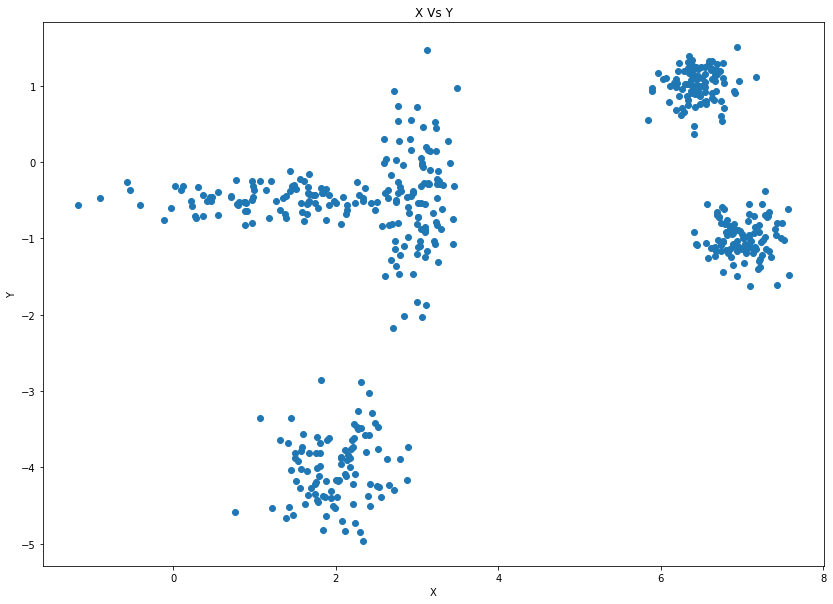

In [74]:
#Visualize the data
X = data_frame.to_numpy().reshape(len(data_frame), -1)
y = data_frame.loc[:,1]

plt.figure(figsize=(14,10))
plt.title('X Vs Y')
plt.scatter(X[:,0],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



In [75]:
#Model Build with 3 clusters
model = KMeans(n_clusters= 3, init='k-means++', random_state=40)
y_kmeans= model.fit_predict(X)

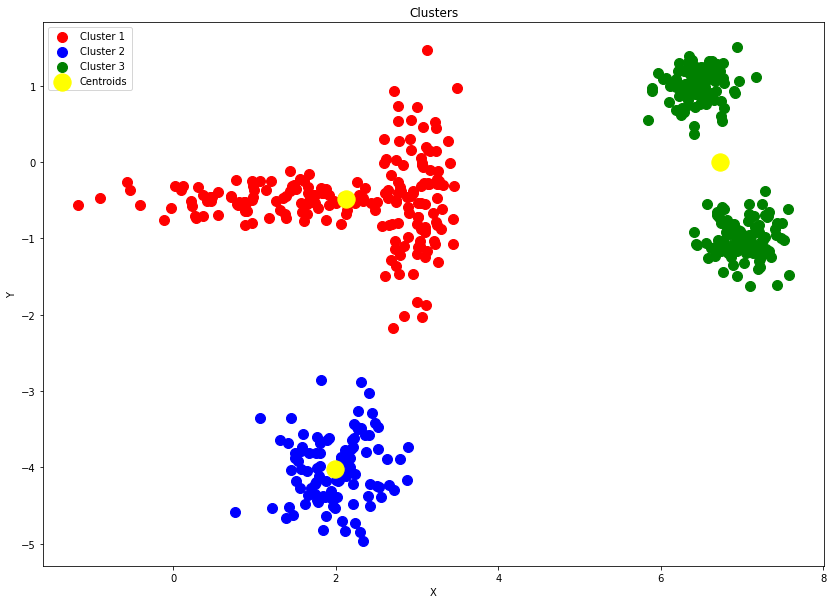

In [76]:
#Visualizing all the clusters 
plt.figure(figsize=(14,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

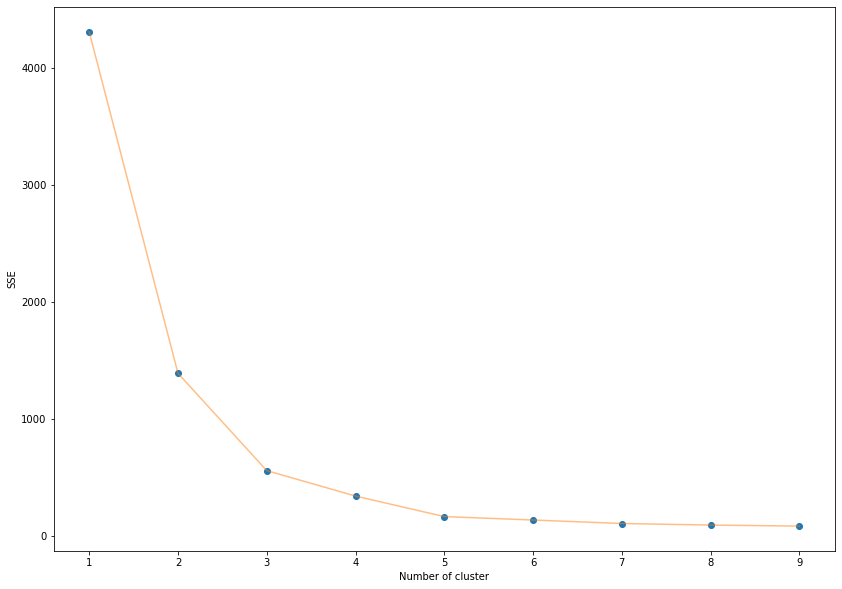

In [102]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,  init='k-means++', random_state=40).fit(X)
    sse[k] = kmeans.inertia_
    # Inertia: Sum of distances of samples to their closest cluster center

plt.figure(1 , figsize = (14,10))
plt.plot(list(sse.keys()) , list(sse.values()) , 'o')
plt.plot(list(sse.keys()) , list(sse.values()) , '-' , alpha = 0.5)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

KMeans requires that we specify the number of clusters. One simple approach is to plot the SSE for a range of cluster sizes. We look for the "elbow" where the SSE begins to level off.The Elbow highlights where the addition of further clusters has diminishing returns. Using the Elbow Score 4 clusters Looks like a good candidate. We can futher confirm this by using the silhouette method.

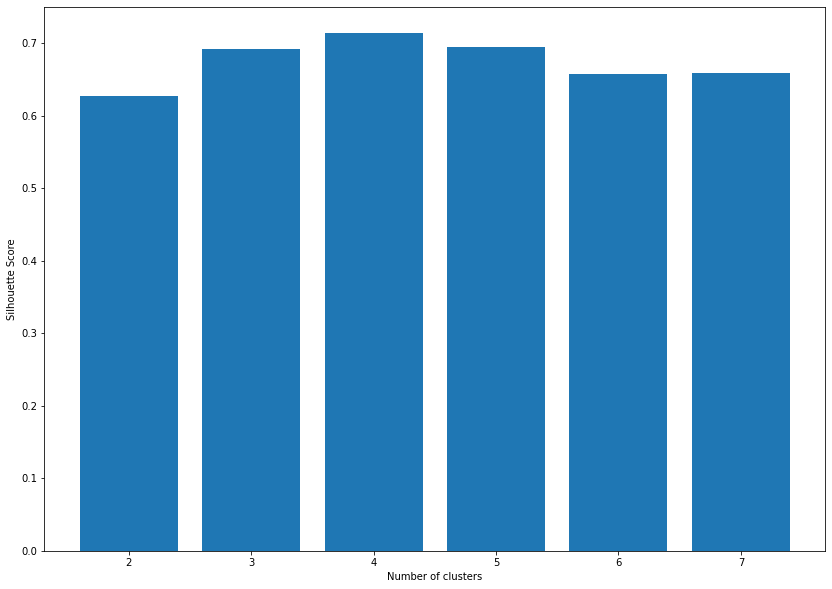

In [108]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.figure(1 , figsize = (14,10))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

 We can say that the optimal number of clusters is 4 as its silhouette score is greater than that of 3 clusters.

From the observations above, I don't agree with my colleague's choice to apply  k-means to partition the data into 3 clusters  :
The result of plotting a scatter plot for the resulting clusters using k-means with  3 clusters (k=3)  does not partition the data well, cluster 3 could still be partitioned into two more clusters.
And also, using the Elbow and Silhouette method suggest that a k-means with 4 clusters (k=4) would be appropriate to partition the data. 

The Silhouette method also verifies the elbow method with 4 clusters being the most optimal.